In [1]:
%matplotlib inline

import pandas as pd
from data_utils import *
import matplotlib.pyplot as plt
import seaborn as sns


c:\softwares\python3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\softwares\python3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_path = input('Enter path to dataset')
df = load_data_df(data_path)

print(df.shape)
df.head()

Enter path to datasetdata/
(362797, 21)


,LN,LC,Valid,W,D1L,D1R,D2L,D2R,D3L,D3R,...,D4R,D5L,D5R,L2,L1,R2,R1,LN1,RN1,Id
0,1,1,255,3.45,4.08,6.52,0.0,2.5,5.24,1.74,...,1.484275,6.2,4.20,1,2,1,2,2,1,1
1,1,1,255,3.45,4.09,0.96,0.0,2.5,5.24,1.74,...,1.484275,6.2,4.20,1,2,1,2,2,1,1
2,1,1,255,3.43,4.09,0.96,0.0,2.5,5.24,1.74,...,1.484275,6.2,4.18,1,2,1,2,2,1,1
3,1,1,255,3.43,4.15,1.06,0.0,2.5,5.24,1.74,...,1.500624,6.2,4.18,1,2,1,2,2,1,1
4,1,1,255,3.42,4.15,1.06,0.0,2.5,5.22,1.74,...,1.500624,6.2,4.18,1,2,1,2,2,1,1


In [3]:
df.describe()

,LN,LC,Valid,W,D1L,D1R,D2L,D2R,D3L,D3R,...,D4R,D5L,D5R,L2,L1,R2,R1,LN1,RN1,Id
count,362797.000000,362797.000000,362797.0,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,...,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000,362797.000000
mean,2.256463,1.000488,255.0,4.142789,5.139325,6.779651,5.178139,7.093910,40.307311,29.803355,...,5.191608,18.935883,37.534589,1.015477,2.539566,1.011621,2.490018,1.596907,1.585644,1.589754
std,0.751899,0.028800,0.0,1.903338,3.945570,5.114579,2.869816,3.703491,46.035492,41.104903,...,2.297185,33.102360,44.182001,0.178041,0.627065,0.139746,0.712189,0.617950,0.678452,0.652964
min,0.000000,0.000000,255.0,2.010000,0.000000,0.020000,0.000000,0.000000,1.540000,0.840000,...,0.424986,0.840000,1.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,255.0,3.400000,2.610000,4.340000,3.020000,5.039999,4.220000,4.840000,...,4.044126,3.660000,5.800000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,255.0,3.590000,4.930000,5.480000,5.470000,6.360000,6.420000,7.800000,...,4.921575,6.380000,8.380000,1.000000,3.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,3.000000,1.000000,255.0,3.650000,6.260000,8.630000,6.900000,9.700000,100.000000,100.000000,...,6.897973,7.700000,100.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,3.000000,255.0,9.900000,40.930000,40.930000,19.240000,19.209999,100.000000,100.000000,...,22.412809,100.000000,100.000000,5.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000


#### Valid is always the same. Drop the column. Also drop instances where DL, DR are > 40

In [4]:
df.drop(columns=['Valid'], inplace=True)
df.Id.unique()  # Unique ID 

array([1, 4, 0, 2, 3], dtype=int64)

In [5]:
df.Id.value_counts()  # Count of each ID

1    173250
2    158764
3     26880
0      2568
4      1335
Name: Id, dtype: int64

#### Highly biased towards ID's 1, 2. This is ok as long as value == 1 when LN != 1

In [6]:
df.LN.value_counts()

2    169791
3    126901
1     54117
4     11059
0       929
Name: LN, dtype: int64

#### Exclude instances where LN == 0, 1

In [ ]:
mat = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(mat, ax=ax, annot=True)

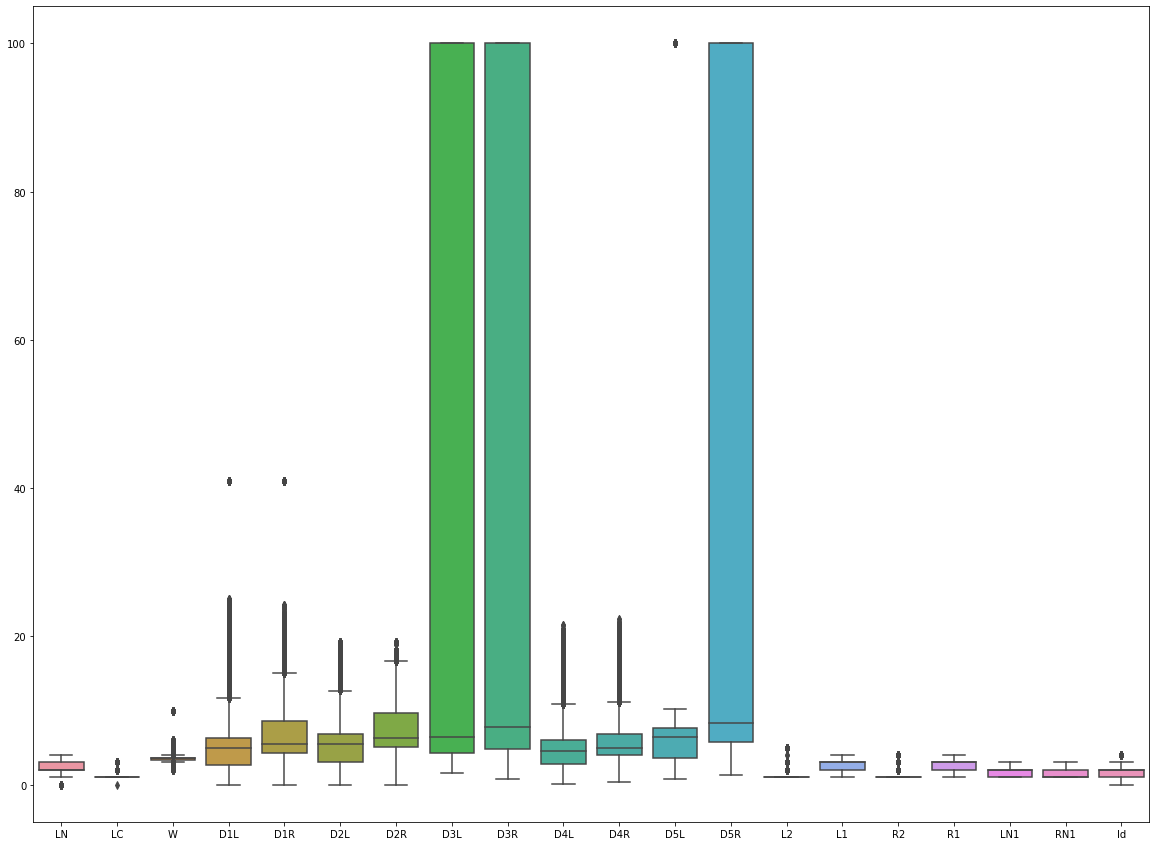

In [15]:
# Box plots
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df, orient='v')

In [21]:
## Data Clean up
df = df[df.LN != 0]
df = df[df.LN != 1]

df = df[df.Id != 0]

df = df[df.D1L < 40.0]  # 40 should be the limit for D
df = df[df.D1R < 40.0]

df = df[df.D2L < 40.0]
df = df[df.D2R < 40.0]

df = df[df.D3L < 40.0]
df = df[df.D3R < 40.0]

df = df[df.D4L < 40.0]
df = df[df.D4R < 40.0]
df.shape

(152100, 20)